# Convolutionele Neurale Netwerken

**Convolutionele Neurale Netwerken** (CNNs) hebben lange tijd (voor de komst van _Vision Transformers_) het domein van machine learning voor computer vision gedomineerd.

## Model
### Convolutionele filters
CNNs bestaan uit verschillende hiërarchische gestructureerde lagen. De lagen verschillen van elkaar naargelang de specifieke tensor-operaties die worden uitgevoerd. Deze familie van neurale netwerken danken hun naam aan een specifiek type laag: **convolutionele filters**. Een dergelijke filter of _kernel_ is in essentie een kleine tensor die over het input-grid verschoven wordt en waarmee een output-grid gecreëerd wordt via element-gewijze vermenigvuldiging en optelling. 

In [1]:
from ml_courses.sim.cnn_viz import (
    visualize_activation_functions,
    visualize_convolution_steps,
    visualize_max_pooling,
    visualize_padding,
    visualize_stride_comparison,
)

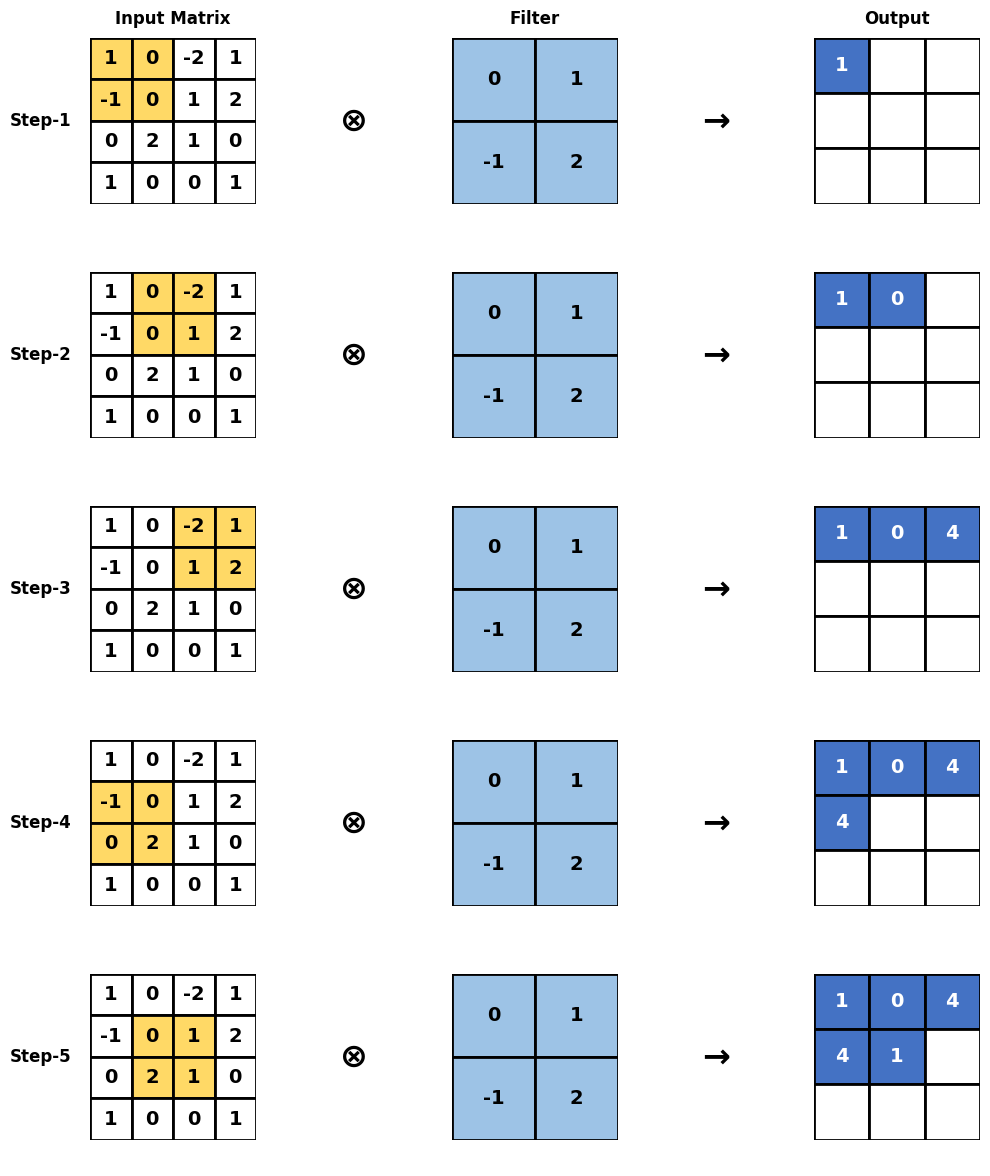


Calculations for each step:
Step 1: (1*0) + (0*1) + (-1*-1) + (0*2) = 1
Step 2: (0*0) + (-2*1) + (0*-1) + (1*2) = 0
Step 3: (-2*0) + (1*1) + (1*-1) + (2*2) = 4
Step 4: (-1*0) + (0*1) + (0*-1) + (2*2) = 4
Step 5: (0*0) + (1*1) + (2*-1) + (1*2) = 1


In [2]:
visualize_convolution_steps()

### _Padding_
De filter fungeert als een soort "lens" die over de input bewogen wordt.  
Vaak wordt de input aangevuld met constante waarden (meestal $0$) om bij de output gelijke dimensies als bij de input te krijgen. Dit proces wordt **_padding_** genoemd.

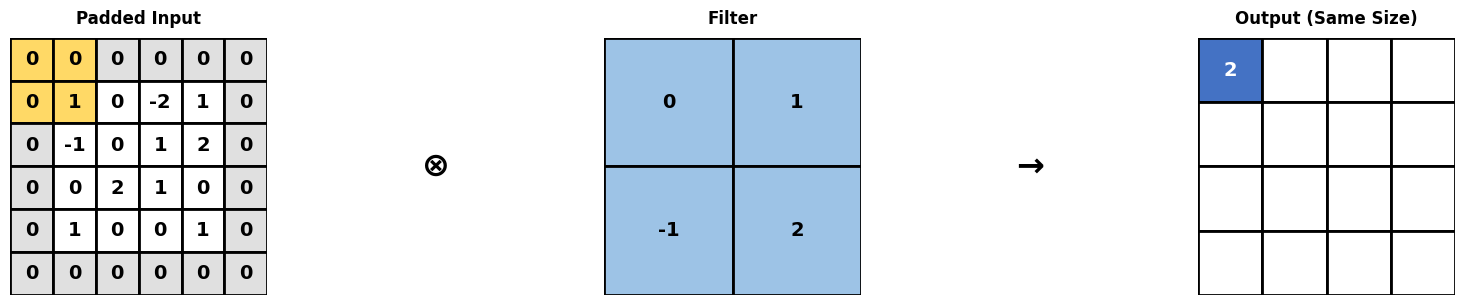


Calculation: (0*0) + (0*1) + (0*-1) + (1*2) = 2


In [3]:
visualize_padding()

### _Stride_
De grootte van de stappen waarmee de filter verschoven wordt, noemen we de **_stride_**.

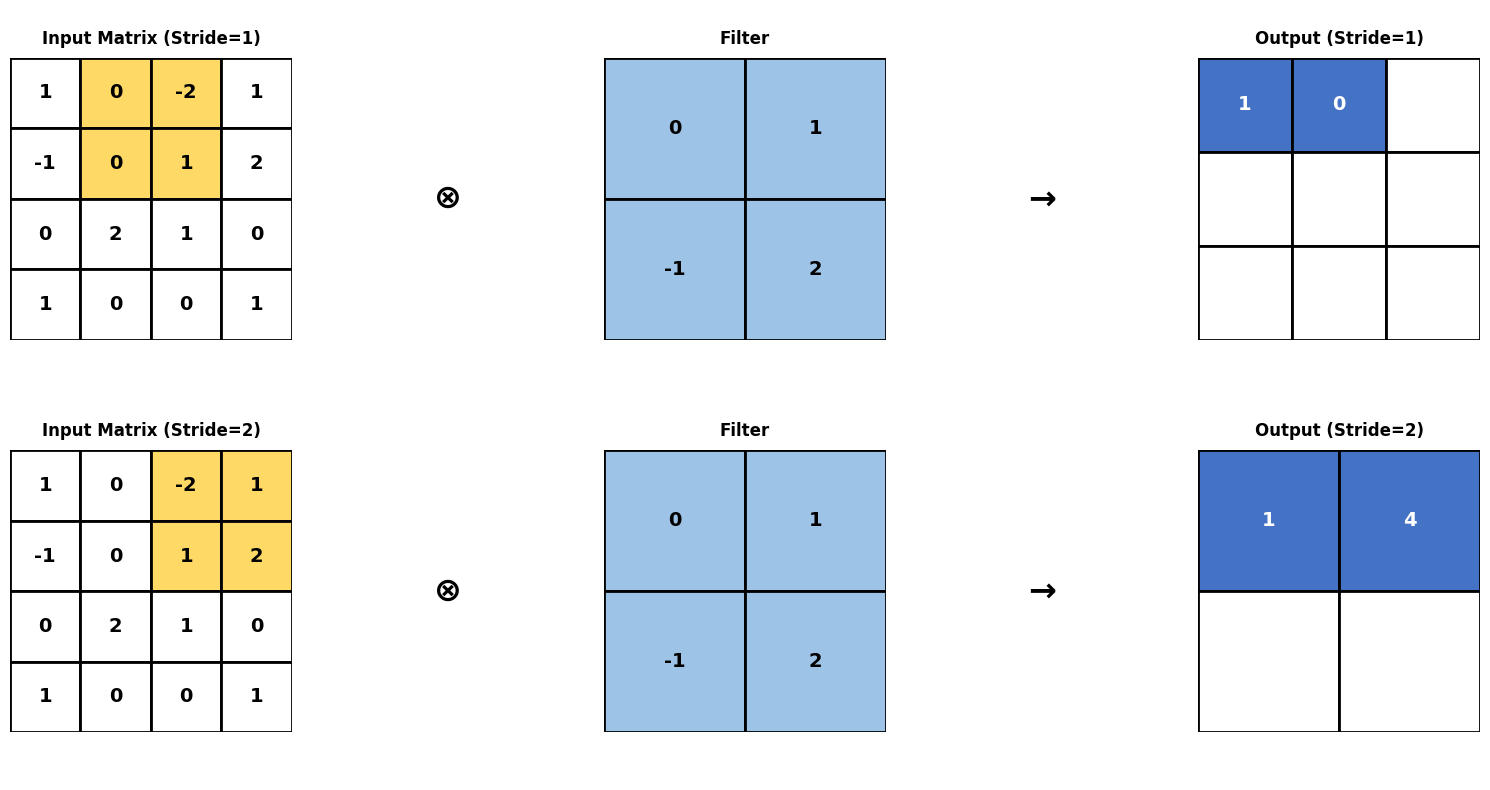


Stride=1, Step 2:
(0*0) + (-2*1) + (0*-1) + (1*2) = 0

Stride=2, Step 2:
(-2*0) + (1*1) + (1*-1) + (2*2) = 4


In [4]:
visualize_stride_comparison()

### Niet-convolutionele lagen/tensoroperaties
Convolutionele lagen worden afgewisseld met andere laagtypes waarin andere tensoroperaties toegepast worden. Ze vormen samen een meerlagige ("diepe"; _deep_) structuur. Voorbeelden van niet-convolutionele lagen/operaties zijn:
- Rectificatie via lineaire units (ReLU): $x^+ = max(0, x)$  

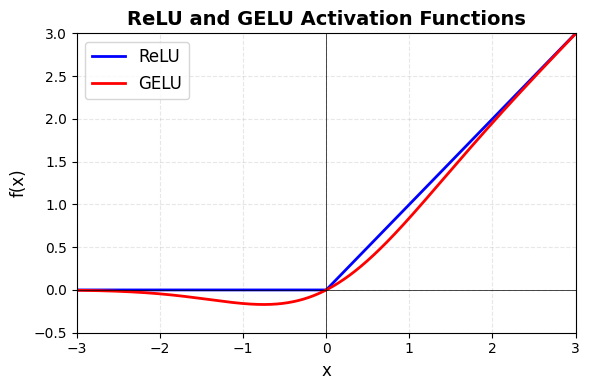

In [5]:
visualize_activation_functions()

- _Pooling_: Downsampling via aggregatie (bv. _max pooling_)  

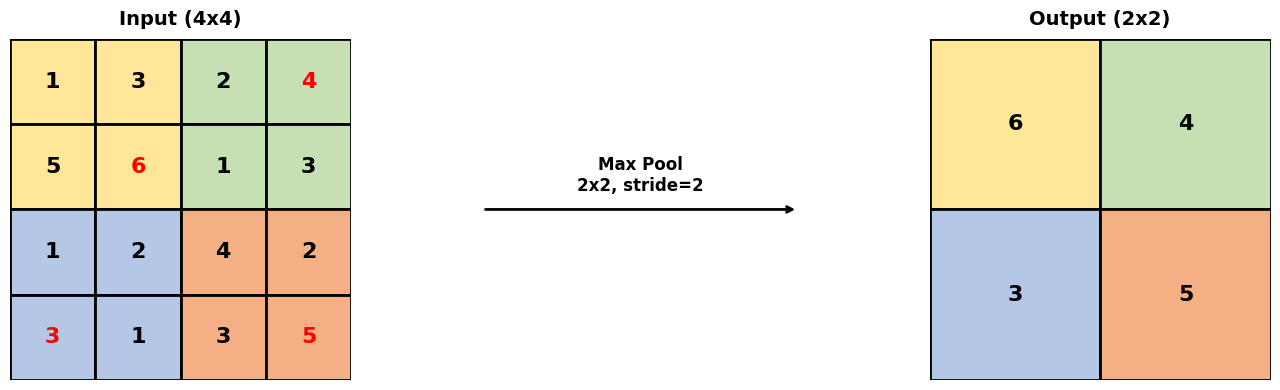

Max Pooling Calculations (2x2 with stride 2):

Top-left region: max([1 3 5 6]) = 6
Top-right region: max([2 4 1 3]) = 4
Bottom-left region: max([1 2 3 1]) = 3
Bottom-right region: max([4 2 3 5]) = 5


In [6]:
visualize_max_pooling()

- _Drop out_: Random uitschakelen van connecties

[![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Dropout_mechanism.png)](https://en.wikipedia.org/wiki/Dilution_(neural_networks))

- enz.  
  
[![](https://adamharley.com/nn_vis/images/convnet_480.png)](https://adamharley.com/nn_vis/cnn/3d.html)
  
## Parameters
De convolutionele _kernels_ zijn het voorwerp van training en hun elementen zijn de belangrijkste parameters van het model. Merk op dat iedere kernel ongewijzigd wordt toegepast op alle secties van de input. Iedere kernel heeft een maximal output bij zijn eigen specifieke patroon. Naast de kernels zijn er ook _offset_ termen voor elke output feature map; zogenaamde _bias_ termen. Naargelang de specifieke architectuur zijn er nog bijkomende parameters, zoals bijvoorbeeld lineaire gewichten bij _fully connected_ output lagen.

[![](https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif)](https://poloclub.github.io/cnn-explainer/)

## Optimalisatie
Parameteroptimalisatie (training) gebeurt iteratief via een vorm van stochastische _gradient descent_ (SGD) [^math_foundations]. Bij de **_forward pass_** worden alle tensoroperaties (lagen) sequentieel toegepast op een bepaald inputbeeld. In quasi alle gevallen wordt met een vorm van supervised learning gewerkt waarbij de output na iedere _forward pass_ wordt vergeleken met een bepaalde target via een _loss_ functie.  
  
**Bij computer vision is er veel variatie in _loss_ functies**. Bij classificatie wordt bijvoorbeeld vaak gewerkt met _cross-entropy_ (de "afstand" tussen output en target _class probabilities_), terwijl er voor objectdetectie kan gewerkt worden met de _Intersection over Union_ (ook gekend als _Jaccard index_).  
  
[![](https://upload.wikimedia.org/wikipedia/commons/2/2d/Intersection_over_Union_-_object_detection_bounding_boxes.jpg)](https://en.wikipedia.org/wiki/Jaccard_index)
[![](https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png)](https://en.wikipedia.org/wiki/Jaccard_index)
  
Een voorbeeld bij _metric/similarity learning_ is de zogenaamde _triplet loss_ functie waarbij de output vergeleken wordt met de output bij een (a) vergelijkbare en (b) niet-vergelijkbare input. Het is de bedoeling dat vergelijkbare inputs dichter bij elkaar komen te liggen in de output tensor-ruimte[^loc2vec]:
  
[![](https://upload.wikimedia.org/wikipedia/commons/2/27/Triplet_Loss_Minimization.png)](https://en.wikipedia.org/wiki/Triplet_loss)
  
Bij de **_backward pass_** wordt de gradient van de _loss_ functie berekend met betrekking tot alle parameters en worden de schattingen, proportioneel aan de _learning rate_, verschoven in de tegenovergestelde richting van de gradient[^math_foundations]. Dit algoritme is beter bekend onder de naam **_backpropagation_**. Omdat _deep_ CNNs uit veel lagen bestaan, kan er tijdens het trainen met backpropagation een probleem ontstaan waarbij de gradient in de onderste lagen veel kleiner is dan voor de parameters in de bovenste lagen (dicht bij de output) - dit fenomeen staat bekend als _vanishing gradients_ en kan voor sterke (en zelfs extreme) vertraging in het leerproces zorgen.
  
Er wordt meestal gekozen om per update (of iteratie) te werken met relatief kleine subsets van de trainingsbeelden in plaats van de _loss_ te berekenen voor de totale dataset. Die subsets worden **mini-batches** genoemd. Dit is computationeel efficiënter. Kleinere batches (`size=1` in het extreme geval) kunnen wel tot instabiliteit in het leerproces zorgen. Alle iteraties die nodig zijn om één keer de volledige trainingsbeelden te "zien", noemen we samen een **_epoch_**. Training bestaat doorgaans uit meerdere _epochs_. Bijvoorbeeld, bij een dataset van 100 beelden kunnen er 1000 epochs zijn, wat betekent dat het model alle inputs 1000 keer heeft aangeboden. Bij een _batch size_ van 25, bestaat iedere epoch dan uit 4 iteraties (parameterupdates).  

[^loc2vec]: Zie bijvoorbeeld: [Loc2Vec](https://sentiance.com/loc2vec-learning-location-embeddings-w-triplet-loss-networks)
[^math_foundations]: Zie cursus _Mathematical Foundations_.

## Taken
Computer vision modellen worden voor verschillende taken gebruikt. In veel gevallen wordt een zelfde basis CNN-architectuur (model _backbone_) gebruikt en wordt enkel de toplaag of -lagen (model _head_) ingewisseld voor taak-specifieke noden.

### Klassificatie
Het model moet leren om beelden in hun geheel te categoriseren (binair of _multi-class_). Dit is één van de fundamentele taken in computer vision waarbij het hele beeld één label krijgt.
  
- [_Inception_](https://en.wikipedia.org/wiki/Inception_(deep_learning_architecture)#Inception_v3) 
- [_ResNet_](https://en.wikipedia.org/wiki/Residual_neural_network)

### Objectdetectie
Het model moet leren om objecten te labelen én te lokaliseren binnen beelden aan de hand van **_bounding boxes_**. Er bestaan verschillende varianten die op geheel andere wijze tot detecties komen.
  
- [_Faster R-CNN_](https://en.wikipedia.org/wiki/Region_Based_Convolutional_Neural_Networks)
- [_YOLO_](https://en.wikipedia.org/wiki/You_Only_Look_Once)

### Semantische segmentatie
Het model moet leren om op het niveau van pixels _class labels_ toe te kennen. Er wordt geen onderscheid gemaakt tussen verschillende instanties van eenzelfde klasse.
  
- [_U-Net_](https://en.wikipedia.org/wiki/U-Net)
- [_DeepLab_](https://arxiv.org/pdf/1606.00915)

### _Instance_ segmentatie
Hier maakt het model voorspellingen over de exacte begrenzing van objecten op pixelniveau.
  
- [_Segment Anything_](https://github.com/facebookresearch/segment-anything)
  
### _Keypoint_ detectie
Het model moet specifieke anatomische of structurele punten lokaliseren in beelden, zoals gewrichten bij mensen of knooppunten bij objecten.
  
- [_OpenPose_](https://github.com/CMU-Perceptual-Computing-Lab/openpose)
- [_ASMNet_](https://arxiv.org/pdf/2103.00119)

[![](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/.github/media/dance_foot.gif?raw=true)](https://github.com/CMU-Perceptual-Computing-Lab/openpose/tree/master)

### Diepteschatting
Het model moet inschatten hoe ver objecten van de camera verwijderd zijn door zogenaamde _depth maps_ te voorspellen
  
- _Depth Anything_ [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/depth-anything/Depth-Anything-V2gg)

### Tekstlokalisatie
Het model moet tekstuele regio's in beelden detecteren en lokaliseren (zonder de tekst zelf te herkennen). Dit is vaak de eerste stap in een OCR-pipeline.
  
- [_EAST_](https://arxiv.org/pdf/1704.03155)

### _Optical Character Recognition_ (OCR)
Het model moet tekst in beelden herkennen en transcriberen naar machine-leesbare tekst. 
  
- [_CRNN_](https://arxiv.org/pdf/1507.05717)

### _Representation learning_
Het model leert algemene beeldrepresentaties (ook **_embeddings_** genoemd) die nuttig zijn voor diverse downstream taken, zoals vector similarity search en few-/zero-shot klassificatie.

- [_SimCLR_](https://research.google/blog/advancing-self-supervised-and-semi-supervised-learning-with-simclr/)

:::{note} _Embeddings_
**_Embedding_ verwijst algemeen naar de techniek om via een machine learning model hoog-dimensionele data te vertalen naar lagere vectoriële ruimtes waarin betekenisvolle patronen en relaties behouden worden**. De resulterende vectoren worden **embeddings** genoemd. 
  
[![](https://img.shields.io/badge/Wikipedia-000?logo=wikipedia&logoColor=fff&style=flat)](https://en.wikipedia.org/wiki/Embedding_(machine_learning))  

Door embeddings op hun beurt samen te drukken in 3/2D (via PCA of t-SNE) kunnen we het effect van embeddings ook [visueel evalueren](https://projector.tensorflow.org/).
:::

## Ervaring
### _Supervised learning_
_Supervised learning_ is heel lang de gouden standaard geweest om CNNs te trainen. Afhankelijk van de taak bestaan er verschillende publieke _geannoteerde_ dataset die ook fungeren als gestandaardiseerde _benchmarks_:
- [_ImageNet_](https://www.image-net.org/): Een iconische dataset voor klassificatie met ~14 miljoen beelden verdeeld over 20.000+ categorieën.
- [_COCO_](https://cocodataset.org/#home) (Common Objects in Context): ~330.000 beelden met meer dan 200.000 gelabelde objecten in 80 categorieën. Bevat ook annotaties voor segmentatie, _keypoints_ en captioning.
- [_Cityscapes_](https://www.cityscapes-dataset.com/): 25.000 beelden van straatscènes met pixel-level annotaties voor 30 klassen (voertuigen, voetgangers, wegen, etc.)
- [_Street View Text_](https://vision.ucsd.edu/datasets/street-view-text): Beelden van Google Street View met tekstannotaties voor _scene text recognition_.
- [_ChestX-ray14_](https://huggingface.co/datasets/alkzar90/NIH-Chest-X-ray-dataset): 112.000 röntgenfoto's van de borst met labels voor 14 pathologieën.
- [_Waymo Open Dataset_](https://waymo.com/open/): ~1000 rijsegmenten (elk ~20 seconden); Hoge-resolutie camera beelden (5 camera's); LiDAR point clouds; 3D bounding box annotaties voor voertuigen, voetgangers, fietsers en verkeersborden; ~12 miljoen 3D labels
- enz.

### _Transfer learning_ en _fine tuning_
Om een goede performantie te krijgen, zeker bij natuurlijk beeldmateriaal, zijn voor _supervised learning_ heel veel geannoteerde trainingsdata nodig en bijgevolg ook veel trainingstijd. Omdat veel grote getrainde modellen open-source beschikbaar zijn, wordt in de praktijk vaak met **_transfer learning_** gewerkt. **_Transfer learning_ betekent dat je een model dat reeds getraind is op een hele grote dataset (bijvoorbeeld ImageNet) hergebruikt voor een nieuwe, gerelateerde taak**. Het basisidee is dat de vroege lagen van een CNN generieke features leren (randen, texturen, kleuren) die nuttig zijn voor veel verschillende taken, terwijl de latere lagen meer taak-specifieke features leren. In de praktijk komt dit neer op het vervangen de laatste taak-specifieke laag/lagen in het netwerk (de _model head_; bv. een lineaire regressielaag). Dit heeft als voordeel dat je doorgaans met een veel kleinere geannoteerde dataset een goede performantie kan bekomen.  
  
**_Fine tuning_ is een gerelateerde aanpak waarbij onderste (feature-extractie) lagen worden _bij-getraind_ (vertrekkende van hun vooraf getrainde waarden)**.

### _Self-supervision_
De jongste jaren is er meer en meer aandacht voor training op basis van **_self-supervision_**. Hierbij wordt algemeen gesproken met een **niet-geannoteerde dataset gewerkt van waaruit toch een _supervised learning_ procedure wordt bekomen door _surrogaat_ labels te creëren**. Een specifiek voorbeeld hiervan is **_contrastive learning_**. Voor iedere input worden getransformeerde varianten gemaakt. Het model wordt dan getraind met een _loss_ functie die de afstand tussen outputtensors minimaliseert bij die varianten. Daarnaast wordt de afstand tussen outputtensors gemaximaliseerd bij twee verschillende inputbeelden. Na een dergelijke generieke trainingsfase wordt dan in een tweede fase via _transfer learning_ of _fine tuning_, met een kleine set geannoteerde beelden een taakspecifiek model getraind.

- [_SimCLR_](https://research.google/blog/advancing-self-supervised-and-semi-supervised-learning-with-simclr/)

## Performantie
### Klassificatie
Voor klassificatie wordt naar standaard metrieken gekeken:
- **_Accuracy_**: Percentage correcte voorspellingen
#### Binair
- **_Precision_**: Fractie van positieve voorspellingen die correct zijn

$$
Precision = \frac{TP}{TP + FP}
$$
- **_Recall_**: Fractie van positieve instances die correct geïdentificeerd zijn

$$
Recall = \frac{TP}{TP + FN}
$$
- **_F1-Score_**: Harmonisch gemiddelde van precision en recall

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
$$
  
[![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)](https://en.wikipedia.org/wiki/F-score)
  
#### _Multi class_
- _Confusion matrix_
```
                Voorspeld
              Kat  Hond  Vogel
Werkelijk Kat   45    3     2
          Hond   2   38     1
          Vogel  1    4    35
```

### Objectdetectie
- **_Intersection over Union_** (IoU): Meet de overlap tussen predicted en ground truth bounding boxes

$$
IoU = \frac{|A \cap B|}{|A \cup B|}
$$
- _Mean Average Precision_ (mAP): Gemiddelde van de _Average Precision_ over alle klassen. _Average Precision_ is het oppervlakte onder de precision-recall curve voor een bepaalde klasse. mAP combineert zowel de nauwkeurigheid van detecties als de volledigheid ervan. 

### Segmentatie
- _Pixel Accuracy_: Percentage correct geclassificeerde pixels
- _Mean Intersection over Union_ (mIoU): Gemiddelde IoU over alle klassen

$$
mIoU = \frac{1}{C} \sum_{c=1}^C \frac{TP_c}{TP_c + FP_c + FN_c}
$$
- _Dice Coefficient_: Meet de overlap tussen predicted en ground truth segmentaties. Vergelijkbaar met IoU maar geeft meer gewicht aan true positives. Varieert tussen 0 (geen overlap) en 1 (perfecte overlap).

$$
Dice = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$ 

### _Keypoint_ detectie
- _Percentage of Correct Keypoints_ (PCK): Percentage keypoints binnen een tolerantieafstand:
- _Mean Per Joint Position Error_ (MPJPE): Gemiddelde Euclidische afstand tussen voorspelde en _ground truth keypoints_

### OCR Metrics
- _Character Error Rate_ (CER): Percentage foutief voorspelde karakters/woorden. Het is de verhouding tussen de _edit distance_ en het totale aantal karakters in de target. _Edit-distance_ meet het minimale aantal bewerkingen nodig om de voorspelde string om te zetten in de target string.

## Voordelen
- Flexibel gebruik in verschillende domeinen
- Hergebruik/finetuning mogelijk met kleine datasets

## Nadelen
- Computationeel zwaar: Kan geaccelereerd worden met GPUs/TPUs/enz., maar deze infrastructuur is zeer kostelijk
- Interpreteerbaarheid: Complexe, ontransparante modelarchitectuur - weliswaar zijn technieken ontwikkeld om inzicht te krijgen in _feature maps_
- Heel veel data en trainingstijd voor nieuwe domeinen